In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [62]:
diabetes_dataframe = pd.read_csv("./Diabetes dataset/Clean_diabetes_dataset.csv")
diabetes_dataframe.head()

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148,72,35,0,33.6,0.627,50,1
1,1,1,85,66,29,0,26.6,0.351,31,0
2,2,8,183,64,0,0,23.3,0.672,32,1
3,3,1,89,66,23,94,28.1,0.167,21,0
4,5,5,116,74,0,0,25.6,0.201,30,0


In [63]:
# checking co-relationn 
corr_matrix = diabetes_dataframe.corr()
corr_matrix

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Unnamed: 0,1.000000,-0.036976,0.015439,0.028201,0.035387,0.033558,0.038722,-0.011275,0.019538,-0.028682
Pregnancies,-0.036976,1.000000,0.142093,0.210666,-0.094425,-0.114510,0.036958,0.009289,0.567438,0.227987
Glucose,0.015439,0.142093,1.000000,0.238754,-0.004609,0.248225,0.192504,0.066530,0.286682,0.492740
BloodPressure,0.028201,0.210666,0.238754,1.000000,0.037388,-0.041513,0.303301,0.024290,0.354036,0.183298
SkinThickness,0.035387,-0.094425,-0.004609,0.037388,1.000000,0.487566,0.390340,0.148486,-0.143376,0.030676
Insulin,0.033558,-0.114510,0.248225,-0.041513,0.487566,1.000000,0.188635,0.213191,-0.089535,0.097746
BMI,0.038722,0.036958,0.192504,0.303301,0.390340,0.188635,1.000000,0.144757,0.063370,0.269371
DiabetesPedigreeFunction,-0.011275,0.009289,0.066530,0.024290,0.148486,0.213191,0.144757,1.000000,0.030081,0.179072
Age,0.019538,0.567438,0.286682,0.354036,-0.143376,-0.089535,0.063370,0.030081,1.000000,0.263344
Outcome,-0.028682,0.227987,0.492740,0.183298,0.030676,0.097746,0.269371,0.179072,0.263344,1.000000


In [64]:
corr_matrix['Outcome']*100

Unnamed: 0                   -2.868235
Pregnancies                  22.798663
Glucose                      49.274005
BloodPressure                18.329784
SkinThickness                 3.067563
Insulin                       9.774559
BMI                          26.937130
DiabetesPedigreeFunction     17.907250
Age                          26.334387
Outcome                     100.000000
Name: Outcome, dtype: float64

<Axes: >

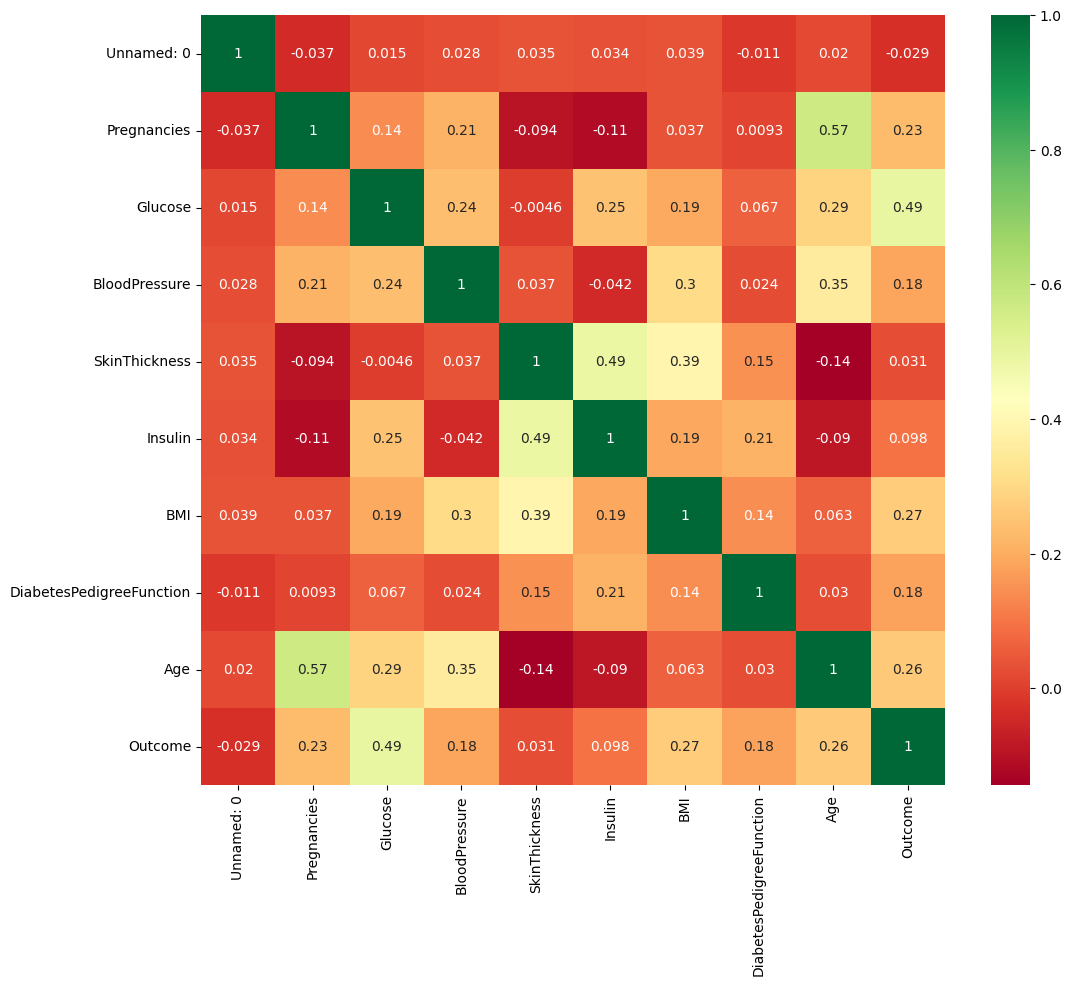

In [65]:
plt.figure(figsize=(12,10))
sns.heatmap(diabetes_dataframe.corr(), annot=True, cmap='RdYlGn')

In [66]:
diabetes_dataframe.drop(columns=["Unnamed: 0","SkinThickness"], inplace=True)

In [67]:
diabetes_dataframe.describe()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,639.000000,639.000000,639.000000,639.000000,639.00000,639.000000,639.000000,639.000000
mean,3.804382,119.112676,72.120501,65.931142,32.00579,0.429177,32.715180,0.312989
std,3.260995,29.162175,11.348686,79.569482,6.43397,0.250957,11.080651,0.464073
min,0.000000,44.000000,38.000000,0.000000,18.20000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,27.30000,0.242000,24.000000,0.000000
50%,3.000000,114.000000,72.000000,37.000000,32.00000,0.358000,29.000000,0.000000
75%,6.000000,137.000000,80.000000,120.000000,35.95000,0.586000,40.000000,1.000000
max,13.000000,198.000000,106.000000,318.000000,50.00000,1.191000,66.000000,1.000000


In [68]:
X = diabetes_dataframe.drop(['Outcome'], axis='columns')
y = diabetes_dataframe.Outcome
print(X.shape,y.shape)

(639, 7) (639,)


In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
len(X_train),len(X_test)

(511, 128)

In [70]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)
print(X_train_sc)
print("----------------------")
print(X_test_sc)

[[-8.79417944e-01  1.00420719e+00 -3.93266230e-01 ... -4.28419343e-01
  -3.23522803e-01  8.04213916e-01]
 [-1.18595449e+00  6.94707870e-01 -6.56646365e-01 ...  1.61600306e+00
   3.54370181e-03 -8.03165397e-01]
 [ 3.46728221e-01  7.57092274e-02  1.18701458e+00 ...  4.01646894e-01
  -5.58851142e-01  5.24259398e-04]
 ...
 [-5.72881403e-01 -6.12067043e-01  1.18701458e+00 ...  2.06177937e+00
  -1.20899554e+00 -8.92464248e-01]
 [-2.66344862e-01 -1.30623654e-01  1.33494041e-01 ... -8.89567252e-01
  -1.28876785e+00 -8.03165397e-01]
 [-8.79417944e-01 -9.62348401e-02  1.36260134e+00 ...  3.70903700e-01
  -1.08137544e-01  6.25616214e-01]]
----------------------
[[-2.66344862e-01 -1.26545450e+00 -1.27120001e+00 -6.14592851e-01
   3.40160506e-01 -3.75374810e-01 -7.13866546e-01]
 [-2.66344862e-01 -1.05912162e+00  1.33494041e-01  2.14053447e-01
  -2.59331776e-01  4.82177612e-01  4.47018513e-01]
 [ 1.26633784e+00 -4.40122975e-01  6.60254312e-01 -8.37214245e-01
  -1.15088440e+00  1.69870547e+00  8.9823

In [71]:
X_train_sc = pd.DataFrame(X_train_sc, columns=["Pregnancies","Glucose","BloodPressure","Insulin","BMI","DiabetesPedigreeFunction","Age"])
X_test_sc = pd.DataFrame(X_test_sc, columns=["Pregnancies","Glucose","BloodPressure","Insulin","BMI","DiabetesPedigreeFunction","Age"])
X_train_sc.describe().round()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
count,511.0,511.0,511.0,511.0,511.0,511.0,511.0
mean,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-1.0,-3.0,-3.0,-1.0,-2.0,-1.0,-1.0
25%,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
50%,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
75%,1.0,1.0,1.0,1.0,1.0,1.0,1.0
max,3.0,3.0,3.0,3.0,3.0,3.0,3.0


In [72]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_sc,y_train)
p = rf.score(X_test_sc,y_test)
print(p*100, "%")

82.03125 %


In [73]:
from sklearn.ensemble import RandomForestClassifier
Score = {}
n_estimators = [10,20,30,50,75]
criterion = ['gini', 'entropy', 'log_loss']
max_features = ['sqrt', 'log2']
for n in n_estimators:
    for c in criterion:
        for mf in max_features:
            model = RandomForestClassifier(n_estimators=n,criterion=c,max_features=mf)
            model.fit(X_train_sc,y_train)
            acc = model.score(X_test_sc,y_test)*100
            Score[n,c,mf] = acc
            
max(Score.values()) # 85.15625
tunedVal = max(Score,key=Score.get)
tunedVal,max(Score.values())

((75, 'log_loss', 'log2'), 84.375)

In [74]:
# # Tuning using GridSearchCV

# # number of trees
# n_estimators = [10,20,30,50,75,100,120]
# # number of features at every split
# max_features = [0.2,0.6,1.0]
# # maximum number of levels
# max_depth = [2,8,None]
# # number of samples
# max_samples = [0.5,0.75,1.0]

# # 5*3*3*3 = 135 different random forest will be trained
# # creating the dict
# param_grid = {
#     'n_estimators': n_estimators,
#     'max_features' : max_features,
#     'max_depth' : max_depth,
#     'max_samples' : max_samples
# }

# from sklearn.ensemble import RandomForestClassifier
# rf = RandomForestClassifier()

# from sklearn.model_selection import GridSearchCV
# rf_grid = GridSearchCV(
#     estimator=rf, param_grid= param_grid, cv=5, verbose=2, n_jobs=-1
# )
# rf_grid.fit(X_train_sc,y_train)

In [86]:

model = RandomForestClassifier(n_estimators=75,criterion='gini',max_features='log2')
model.fit(X_train_sc,y_train)
model.score(X_test_sc,y_test)*100 
# best score -> 87.5

84.375

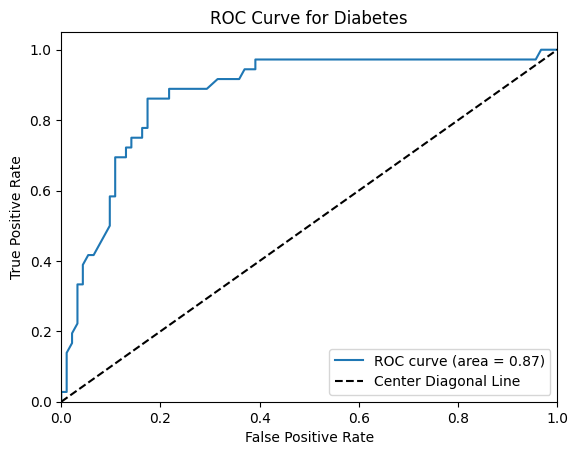

In [87]:
from sklearn.metrics import roc_curve, auc
y_pred_proba = rf.predict_proba(X_test_sc)[::,1]


# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba) 
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()  
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Center Diagonal Line')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Diabetes')
plt.legend()
plt.show()

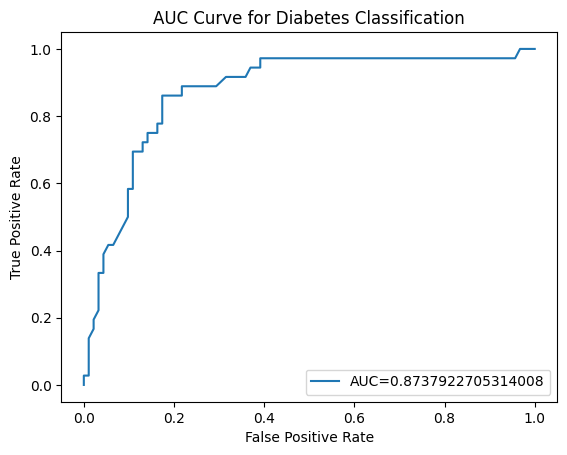

In [88]:
### AUC curve
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('AUC Curve for Diabetes Classification')
plt.legend(loc=4)
plt.show()

In [89]:
y_pred = model.predict(X_test_sc)
from sklearn.metrics import confusion_matrix, classification_report 
cm = confusion_matrix(y_test, y_pred)
cm

array([[83,  9],
       [11, 25]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

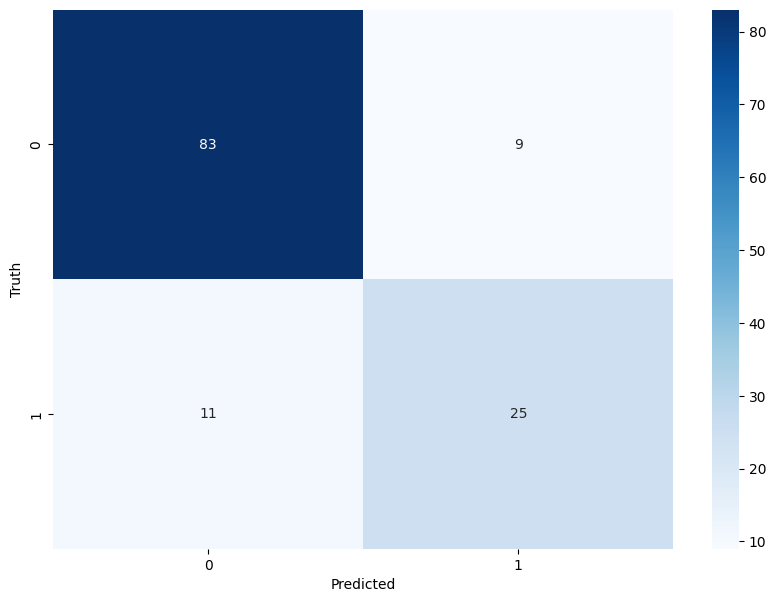

In [90]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [91]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        92
           1       0.74      0.69      0.71        36

    accuracy                           0.84       128
   macro avg       0.81      0.80      0.80       128
weighted avg       0.84      0.84      0.84       128



In [92]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('mae => ', mae)
print('mse => ', mse)
print('rmse => ', rmse)

mae =>  0.15625
mse =>  0.15625
rmse =>  0.39528470752104744


In [93]:
import pickle

In [94]:
pickle_out = open("DM_RF.pkl","wb")
pickle.dump ( model, pickle_out )
pickle_out.close()

In [106]:
model.predict([[5,89,66,0,25.6,0.201,21]])

C:\Users\babun\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)